In [1]:
# Import all the libraries:

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, least_squares
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date

In [2]:
# Wells dataset
# well_D18 = pd.read_csv('Johan Sverdrup DP/NO162D18-2.csv',sep=';')
# well_D6 = pd.read_csv('Johan Sverdrup DP/NO162D6-4.csv',sep=';')
# well_D20 = pd.read_csv('Johan Sverdrup DP/NO162D20-6.csv',sep=';')
# well_D23 = pd.read_csv('Johan Sverdrup DP/NO162D23-3.csv',sep=';')
well_D41 = pd.read_csv('Johan Sverdrup DP/NO162D41-5.csv',sep=';')
# well_D42 = pd.read_csv('Johan Sverdrup DP/NO162D42-1.csv',sep=';')

df = well_D41
print('shape:', df.shape)

df

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape: (1413695, 16)


depthBit depthBit.1             depthHole depthHole.1  \
0                       INDEX      VALUE                 INDEX       VALUE   
1                        time          m                  time           m   
2        2020-06-23T06:58:29Z        0.0  2020-06-23T06:58:29Z         0.0   
3        2020-06-23T06:58:30Z        0.0  2020-06-23T06:58:30Z         0.0   
4        2020-06-23T06:58:32Z        0.0  2020-06-23T06:58:32Z         0.0   
...                       ...        ...                   ...         ...   
1413690                   NaN        NaN  2020-07-26T23:59:53Z     4373.01   
1413691                   NaN        NaN  2020-07-26T23:59:55Z     4373.01   
1413692                   NaN        NaN  2020-07-26T23:59:56Z     4373.01   
1413693                   NaN        NaN  2020-07-26T23:59:59Z     4373.01   
1413694                   NaN        NaN  2020-07-27T00:00:00Z     4373.01   

                          rpm  rpm.1                torque torque.1  \
0                       INDEX  VALUE                 INDEX    VALUE   
1                        time  rev/s                  time      N.m   
2        2020-06-23T06:58:29Z    0.0  2020-06-23T06:58:29Z      0.0   
3        2020-06-23T06:58:32Z    0.0  2020-06-23T06:58:32Z      0.0   
4        2020-06-23T06:58:34Z    0.0  2020-06-23T06:58:34Z      0.0   
...                       ...    ...                   ...      ...   
1413690                   NaN    NaN                   NaN      NaN   
1413691                   NaN    NaN                   NaN      NaN   
1413692                   NaN    NaN                   NaN      NaN   
1413693                   NaN    NaN                   NaN      NaN   
1413694                   NaN    NaN                   NaN      NaN   

                  weightOnBit weightOnBit.1                velRop velRop.1  \
0                       INDEX         VALUE                 INDEX    VALUE   
1                        time             N                  time      m/s   
2        2020-06-23T06:58:29Z           0.0  2020-06-23T06:58:29Z      0.0   
3        2020-06-23T06:58:32Z           0.0  2020-06-23T06:58:32Z      0.0   
4        2020-06-23T06:58:34Z           0.0  2020-06-23T06:58:34Z      0.0   
...                       ...           ...                   ...      ...   
1413690                   NaN           NaN                   NaN      NaN   
1413691                   NaN           NaN                   NaN      NaN   
1413692                   NaN           NaN                   NaN      NaN   
1413693                   NaN           NaN                   NaN      NaN   
1413694                   NaN           NaN                   NaN      NaN   

                       flowIn flowIn.1     standpipePressure  \
0                       INDEX    VALUE                 INDEX   
1                        time     m3/s                  time   
2        2020-06-23T06:58:29Z      0.0  2020-06-23T06:58:29Z   
3        2020-06-23T06:58:32Z      0.0  2020-06-23T06:58:32Z   
4        2020-06-23T06:58:34Z      0.0  2020-06-23T06:58:34Z   
...                       ...      ...                   ...   
1413690                   NaN      NaN                   NaN   
1413691                   NaN      NaN                   NaN   
1413692                   NaN      NaN                   NaN   
1413693                   NaN      NaN                   NaN   
1413694                   NaN      NaN                   NaN   

        standpipePressure.1  
0                     VALUE  
1                        Pa  
2                  285027.0  
3                  284938.0  
4                  285160.0  
...                     ...  
1413690                 NaN  
1413691                 NaN  
1413692                 NaN  
1413693                 NaN  
1413694                 NaN  

[1413695 rows x 16 columns]

In [3]:
df.columns = ['time_DB','Depth Bit[m]','time_DH','Depth Hole[m]','time_RPM','RPM[rev/s]','time_TOR','Torque[N.m]',
              'time_WOB','WOB[N]', 'time_ROP','ROP[m/s]','time_FR','Flow rate[m3/s]','time_SPP','Stand Pipe Pressure[Pa]' ]
df

time_DB Depth Bit[m]               time_DH  \
0                       INDEX        VALUE                 INDEX   
1                        time            m                  time   
2        2020-06-23T06:58:29Z          0.0  2020-06-23T06:58:29Z   
3        2020-06-23T06:58:30Z          0.0  2020-06-23T06:58:30Z   
4        2020-06-23T06:58:32Z          0.0  2020-06-23T06:58:32Z   
...                       ...          ...                   ...   
1413690                   NaN          NaN  2020-07-26T23:59:53Z   
1413691                   NaN          NaN  2020-07-26T23:59:55Z   
1413692                   NaN          NaN  2020-07-26T23:59:56Z   
1413693                   NaN          NaN  2020-07-26T23:59:59Z   
1413694                   NaN          NaN  2020-07-27T00:00:00Z   

        Depth Hole[m]              time_RPM RPM[rev/s]              time_TOR  \
0               VALUE                 INDEX      VALUE                 INDEX   
1                   m                  time      rev/s                  time   
2                 0.0  2020-06-23T06:58:29Z        0.0  2020-06-23T06:58:29Z   
3                 0.0  2020-06-23T06:58:32Z        0.0  2020-06-23T06:58:32Z   
4                 0.0  2020-06-23T06:58:34Z        0.0  2020-06-23T06:58:34Z   
...               ...                   ...        ...                   ...   
1413690       4373.01                   NaN        NaN                   NaN   
1413691       4373.01                   NaN        NaN                   NaN   
1413692       4373.01                   NaN        NaN                   NaN   
1413693       4373.01                   NaN        NaN                   NaN   
1413694       4373.01                   NaN        NaN                   NaN   

        Torque[N.m]              time_WOB WOB[N]              time_ROP  \
0             VALUE                 INDEX  VALUE                 INDEX   
1               N.m                  time      N                  time   
2               0.0  2020-06-23T06:58:29Z    0.0  2020-06-23T06:58:29Z   
3               0.0  2020-06-23T06:58:32Z    0.0  2020-06-23T06:58:32Z   
4               0.0  2020-06-23T06:58:34Z    0.0  2020-06-23T06:58:34Z   
...             ...                   ...    ...                   ...   
1413690         NaN                   NaN    NaN                   NaN   
1413691         NaN                   NaN    NaN                   NaN   
1413692         NaN                   NaN    NaN                   NaN   
1413693         NaN                   NaN    NaN                   NaN   
1413694         NaN                   NaN    NaN                   NaN   

        ROP[m/s]               time_FR Flow rate[m3/s]              time_SPP  \
0          VALUE                 INDEX           VALUE                 INDEX   
1            m/s                  time            m3/s                  time   
2            0.0  2020-06-23T06:58:29Z             0.0  2020-06-23T06:58:29Z   
3            0.0  2020-06-23T06:58:32Z             0.0  2020-06-23T06:58:32Z   
4            0.0  2020-06-23T06:58:34Z             0.0  2020-06-23T06:58:34Z   
...          ...                   ...             ...                   ...   
1413690      NaN                   NaN             NaN                   NaN   
1413691      NaN                   NaN             NaN                   NaN   
1413692      NaN                   NaN             NaN                   NaN   
1413693      NaN                   NaN             NaN                   NaN   
1413694      NaN                   NaN             NaN                   NaN   

        Stand Pipe Pressure[Pa]  
0                         VALUE  
1                            Pa  
2                      285027.0  
3                      284938.0  
4                      285160.0  
...                         ...  
1413690                     NaN  
1413691                     NaN  
1413692                     NaN  
1413693                     NaN  
1413694             

In [4]:
df = df.drop(df.index[[0,1]])
df.index = list(range(df.shape[0]))
df

time_DB Depth Bit[m]               time_DH  \
0        2020-06-23T06:58:29Z          0.0  2020-06-23T06:58:29Z   
1        2020-06-23T06:58:30Z          0.0  2020-06-23T06:58:30Z   
2        2020-06-23T06:58:32Z          0.0  2020-06-23T06:58:32Z   
3        2020-06-23T06:58:34Z          0.0  2020-06-23T06:58:34Z   
4        2020-06-23T06:58:37Z          0.0  2020-06-23T06:58:35Z   
...                       ...          ...                   ...   
1413688                   NaN          NaN  2020-07-26T23:59:53Z   
1413689                   NaN          NaN  2020-07-26T23:59:55Z   
1413690                   NaN          NaN  2020-07-26T23:59:56Z   
1413691                   NaN          NaN  2020-07-26T23:59:59Z   
1413692                   NaN          NaN  2020-07-27T00:00:00Z   

        Depth Hole[m]              time_RPM RPM[rev/s]              time_TOR  \
0                 0.0  2020-06-23T06:58:29Z        0.0  2020-06-23T06:58:29Z   
1                 0.0  2020-06-23T06:58:32Z        0.0  2020-06-23T06:58:32Z   
2                 0.0  2020-06-23T06:58:34Z        0.0  2020-06-23T06:58:34Z   
3                 0.0  2020-06-23T06:58:37Z        0.0  2020-06-23T06:58:37Z   
4                 0.0  2020-06-23T06:58:40Z        0.0  2020-06-23T06:58:40Z   
...               ...                   ...        ...                   ...   
1413688       4373.01                   NaN        NaN                   NaN   
1413689       4373.01                   NaN        NaN                   NaN   
1413690       4373.01                   NaN        NaN                   NaN   
1413691       4373.01                   NaN        NaN                   NaN   
1413692       4373.01                   NaN        NaN                   NaN   

        Torque[N.m]              time_WOB WOB[N]              time_ROP  \
0               0.0  2020-06-23T06:58:29Z    0.0  2020-06-23T06:58:29Z   
1               0.0  2020-06-23T06:58:32Z    0.0  2020-06-23T06:58:32Z   
2               0.0  2020-06-23T06:58:34Z    0.0  2020-06-23T06:58:34Z   
3               0.0  2020-06-23T06:58:37Z    0.0  2020-06-23T06:58:37Z   
4               0.0  2020-06-23T06:58:40Z    0.0  2020-06-23T06:58:40Z   
...             ...                   ...    ...                   ...   
1413688         NaN                   NaN    NaN                   NaN   
1413689         NaN                   NaN    NaN                   NaN   
1413690         NaN                   NaN    NaN                   NaN   
1413691         NaN                   NaN    NaN                   NaN   
1413692         NaN                   NaN    NaN                   NaN   

        ROP[m/s]               time_FR Flow rate[m3/s]              time_SPP  \
0            0.0  2020-06-23T06:58:29Z             0.0  2020-06-23T06:58:29Z   
1            0.0  2020-06-23T06:58:32Z             0.0  2020-06-23T06:58:32Z   
2            0.0  2020-06-23T06:58:34Z             0.0  2020-06-23T06:58:34Z   
3            0.0  2020-06-23T06:58:37Z             0.0  2020-06-23T06:58:37Z   
4            0.0  2020-06-23T06:58:40Z             0.0  2020-06-23T06:58:40Z   
...          ...                   ...             ...                   ...   
1413688      NaN                   NaN             NaN                   NaN   
1413689      NaN                   NaN             NaN                   NaN   
1413690      NaN                   NaN             NaN                   NaN   
1413691      NaN                   NaN             NaN                   NaN   
1413692      NaN                   NaN             NaN                   NaN   

        Stand Pipe Pressure[Pa]  
0                      285027.0  
1                      284938.0  
2                      285160.0  
3                      285045.0  
4                      285226.0  
...                         ...  
1413688                     NaN  
1413689                     NaN  
1413690                     NaN  
1413691                     NaN  
1413692             

In [8]:
df.dtypes

time_DB                    datetime64[ns, UTC]
Depth Bit[m]                           float64
time_DH                    datetime64[ns, UTC]
Depth Hole[m]                          float64
time_RPM                   datetime64[ns, UTC]
RPM[rev/s]                             float64
time_TOR                   datetime64[ns, UTC]
Torque[N.m]                            float64
time_WOB                   datetime64[ns, UTC]
WOB[N]                                 float64
time_ROP                   datetime64[ns, UTC]
ROP[m/s]                               float64
time_FR                    datetime64[ns, UTC]
Flow rate[m3/s]                        float64
time_SPP                   datetime64[ns, UTC]
Stand Pipe Pressure[Pa]                float64
dtype: object

In [9]:
# Convert in datetime and to numeric

df['time_DB'] = pd.to_datetime(df['time_DB'])
df['time_DH'] = pd.to_datetime(df['time_DH'])
df['time_RPM'] = pd.to_datetime(df['time_RPM'])
df['time_TOR'] = pd.to_datetime(df['time_TOR'])
df['time_WOB'] = pd.to_datetime(df['time_WOB'])
df['time_ROP'] = pd.to_datetime(df['time_ROP'])
df['time_FR'] = pd.to_datetime(df['time_FR'])
df['time_SPP'] = pd.to_datetime(df['time_SPP'])

df['Depth Bit[m]'] = pd.to_numeric(df['Depth Bit[m]'])
df['Depth Hole[m]'] = pd.to_numeric(df['Depth Hole[m]'])
df['RPM[rev/s]'] = pd.to_numeric(df['RPM[rev/s]'])
df['Torque[N.m]'] = pd.to_numeric(df['Torque[N.m]'])
df['WOB[N]'] = pd.to_numeric(df['WOB[N]'])
df['ROP[m/s]'] = pd.to_numeric(df['ROP[m/s]'])
df['Flow rate[m3/s]'] = pd.to_numeric(df['Flow rate[m3/s]'])
df['Stand Pipe Pressure[Pa]'] = pd.to_numeric(df['Stand Pipe Pressure[Pa]'])

df.dtypes

time_DB                    datetime64[ns, UTC]
Depth Bit[m]                           float64
time_DH                    datetime64[ns, UTC]
Depth Hole[m]                          float64
time_RPM                   datetime64[ns, UTC]
RPM[rev/s]                             float64
time_TOR                   datetime64[ns, UTC]
Torque[N.m]                            float64
time_WOB                   datetime64[ns, UTC]
WOB[N]                                 float64
time_ROP                   datetime64[ns, UTC]
ROP[m/s]                               float64
time_FR                    datetime64[ns, UTC]
Flow rate[m3/s]                        float64
time_SPP                   datetime64[ns, UTC]
Stand Pipe Pressure[Pa]                float64
dtype: object

In [10]:
df.describe()

Depth Bit[m]  Depth Hole[m]    RPM[rev/s]   Torque[N.m]        WOB[N]  \
count  1.280822e+06   1.413693e+06  1.037658e+06  1.037681e+06  1.037683e+06   
mean   1.609877e+03   2.349484e+03  6.099433e-01  6.788479e+03  1.058066e+05   
std    1.439297e+03   1.207443e+03  9.246116e-01  9.037547e+03  1.643013e+05   
min   -3.351380e+01   0.000000e+00  0.000000e+00  0.000000e+00 -8.999930e+04   
25%    3.901000e+01   1.220000e+03  0.000000e+00  1.067480e+01  5.479835e+02   
50%    1.214767e+03   2.210120e+03  0.000000e+00  5.017150e+02  4.027540e+04   
75%    3.172330e+03   3.360010e+03  1.277070e+00  1.487530e+04  1.417985e+05   
max    4.373011e+03   4.373011e+03  3.302060e+00  5.967210e+04  4.999980e+05   

           ROP[m/s]  Flow rate[m3/s]  Stand Pipe Pressure[Pa]  
count  1.037686e+06     1.037676e+06             1.037672e+06  
mean   2.243403e-04     2.272211e-02             6.707079e+06  
std    9.048333e-02     2.954760e-02             8.663310e+06  
min   -1.687900e+00     0.000000e+00            -4.540660e+03  
25%    0.000000e+00     0.000000e+00             5.755612e+04  
50%    0.000000e+00     0.000000e+00             5.634460e+05  
75%    1.039900e-03     3.809800e-02             1.343150e+07  
max    1.601010e+00     8.473700e-02             3.462660e+07

In [11]:
# Create dataframe for each parameter:
df_DB = pd.concat([df['time_DB'] , df['Depth Bit[m]'] ], join = 'outer', axis = 1) 
df_DH = pd.concat([df['time_DH'] , df['Depth Hole[m]'] ], join = 'outer', axis = 1)
df_RPM = pd.concat([df['time_RPM'] , df['RPM[rev/s]'] ], join = 'outer', axis = 1)
df_TOR = pd.concat([df['time_TOR'] , df['Torque[N.m]'] ], join = 'outer', axis = 1)
df_WOB = pd.concat([df['time_WOB'] , df['WOB[N]'] ], join = 'outer', axis = 1)
df_ROP = pd.concat([df['time_ROP'] , df['ROP[m/s]'] ], join = 'outer', axis = 1)
df_FR = pd.concat([df['time_FR'] , df['Flow rate[m3/s]'] ], join = 'outer', axis = 1)
df_SPP = pd.concat([df['time_SPP'] , df['Stand Pipe Pressure[Pa]'] ], join = 'outer', axis = 1)

df_ROP

time_ROP  ROP[m/s]
0       2020-06-23 06:58:29+00:00       0.0
1       2020-06-23 06:58:32+00:00       0.0
2       2020-06-23 06:58:34+00:00       0.0
3       2020-06-23 06:58:37+00:00       0.0
4       2020-06-23 06:58:40+00:00       0.0
...                           ...       ...
1413688                       NaT       NaN
1413689                       NaT       NaN
1413690                       NaT       NaN
1413691                       NaT       NaN
1413692                       NaT       NaN

[1413693 rows x 2 columns]

In [12]:
# Missing values per column:
df.isnull().sum(axis=0)

time_DB                    132871
Depth Bit[m]               132871
time_DH                         0
Depth Hole[m]                   0
time_RPM                   376035
RPM[rev/s]                 376035
time_TOR                   376012
Torque[N.m]                376012
time_WOB                   376010
WOB[N]                     376010
time_ROP                   376007
ROP[m/s]                   376007
time_FR                    376017
Flow rate[m3/s]            376017
time_SPP                   376021
Stand Pipe Pressure[Pa]    376021
dtype: int64

In [13]:
# using Dropna, delete all rows with missing values:
df_DB = df_DB.dropna()
df_DH = df_DH.dropna() 
df_RPM = df_RPM.dropna()
df_TOR = df_TOR.dropna()
df_WOB = df_WOB.dropna()
df_ROP = df_ROP.dropna()
df_FR = df_FR.dropna()
df_SPP = df_SPP.dropna()

In [14]:
# Check duplicates:

print('no. of duplicates DB', df_DB.duplicated().sum(axis=0))
print('no. of duplicates DH', df_DB.duplicated().sum(axis=0))
print('no. of duplicates RPM', df_RPM.duplicated().sum(axis=0))
print('no. of duplicates Torque', df_TOR.duplicated().sum(axis=0))
print('no. of duplicates WOB', df_WOB.duplicated().sum(axis=0))
print('no. of duplicates ROP', df_ROP.duplicated().sum(axis=0))
print('no. of duplicates FR', df_FR.duplicated().sum(axis=0))
print('no. of duplicates SPP', df_SPP.duplicated().sum(axis=0))

no. of duplicates DB 0
no. of duplicates DH 0
no. of duplicates RPM 0
no. of duplicates Torque 0
no. of duplicates WOB 0
no. of duplicates ROP 0
no. of duplicates FR 0
no. of duplicates SPP 0


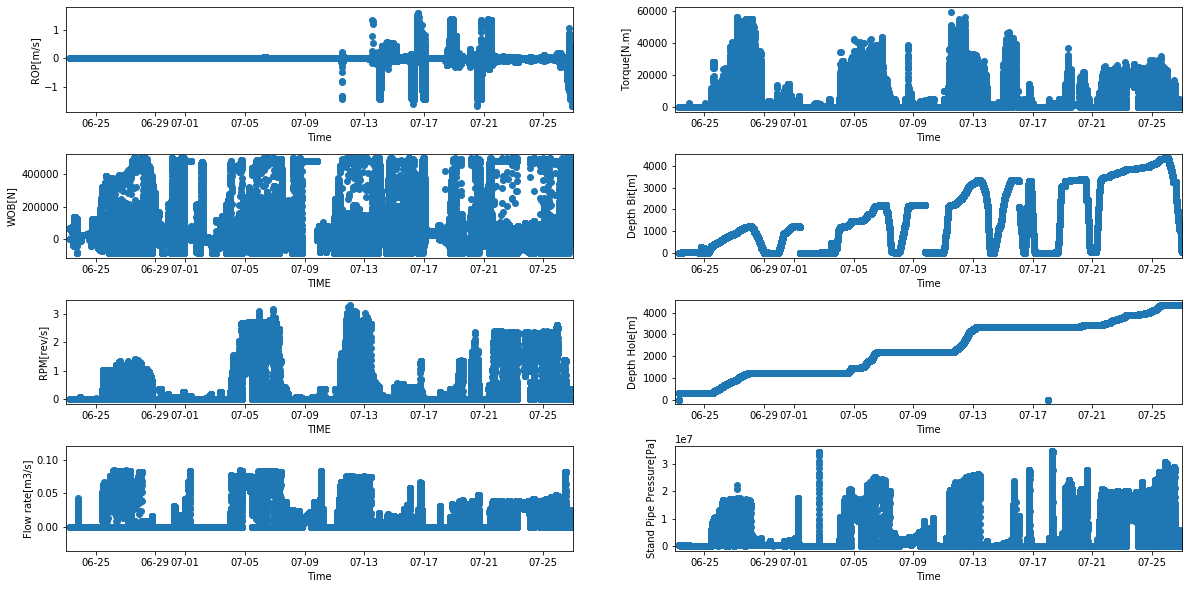

In [12]:
# Plot variables vs time:
date_form = DateFormatter("%m-%d")

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df_ROP['time_ROP'],df_ROP['ROP[m/s]'])
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))


WOB_t.scatter(df_WOB['time_WOB'],df_WOB['WOB[N]'] )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

RPM_t.scatter(df_RPM['time_RPM'],df_RPM['RPM[rev/s]'])
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

TOR_t.scatter(df_TOR['time_TOR'],df_TOR['Torque[N.m]'])
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DB_t.scatter(df_DB['time_DB'],df_DB['Depth Bit[m]'])
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DH_t.scatter(df_DH['time_DH'],df_DH['Depth Hole[m]'])
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

FR_t.scatter(df_FR['time_FR'],df_FR['Flow rate[m3/s]'])
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

SPP_t.scatter(df_SPP['time_SPP'],df_SPP['Stand Pipe Pressure[Pa]'])
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

plt.show()

In [15]:
# First we change the name of column in all datasets:

df_DB = df_DB.rename(columns={'time_DB':'time'})
df_DH = df_DH.rename(columns={'time_DH':'time'})
df_RPM = df_RPM.rename(columns={'time_RPM':'time'})
df_ROP = df_ROP.rename(columns={'time_ROP':'time'})
df_WOB = df_WOB.rename(columns={'time_WOB':'time'})
df_TOR = df_TOR.rename(columns={'time_TOR':'time'})
df_FR = df_FR.rename(columns={'time_FR':'time'})
df_SPP = df_SPP.rename(columns={'time_SPP':'time'})

# Then we merge the dataframes:

df1 = pd.merge_asof(df_DH,df_DB,on='time', tolerance = pd.Timedelta('0.1s'))
df2 = pd.merge_asof(df_ROP, df_RPM, on='time', tolerance = pd.Timedelta('0.1s'))
df3 = pd.merge_asof(df_WOB, df_TOR, on='time', tolerance = pd.Timedelta('0.1s'))
df4 = pd.merge_asof(df_FR, df_SPP, on='time', tolerance = pd.Timedelta('0.1s'))
df5 = pd.merge_asof(df1, df2, on='time', tolerance = pd.Timedelta('0.1s'))
df6 = pd.merge_asof(df3, df4, on='time', tolerance = pd.Timedelta('0.1s'))
df_merged = pd.merge_asof(df5, df6, on='time', tolerance = pd.Timedelta('0.1s'))

df_merged

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
0       2020-06-23 06:58:29+00:00           0.00      0.000000  0.000000   
1       2020-06-23 06:58:30+00:00           0.00      0.000000       NaN   
2       2020-06-23 06:58:32+00:00           0.00      0.000000  0.000000   
3       2020-06-23 06:58:34+00:00           0.00      0.000000  0.000000   
4       2020-06-23 06:58:35+00:00           0.00           NaN       NaN   
...                           ...            ...           ...       ...   
1413688 2020-07-26 23:59:53+00:00        4373.01     50.077800 -0.000005   
1413689 2020-07-26 23:59:55+00:00        4373.01           NaN       NaN   
1413690 2020-07-26 23:59:56+00:00        4373.01     50.077800  0.000004   
1413691 2020-07-26 23:59:59+00:00        4373.01     50.077800  0.000003   
1413692 2020-07-27 00:00:00+00:00        4373.01     50.077784       NaN   

         RPM[rev/s]    WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
0               0.0     0.000          0.0              0.0   
1               NaN       NaN          NaN              NaN   
2               0.0     0.000          0.0              0.0   
3               0.0     0.000          0.0              0.0   
4               NaN       NaN          NaN              NaN   
...             ...       ...          ...              ...   
1413688         0.0  1237.570          0.0              0.0   
1413689         NaN       NaN          NaN              NaN   
1413690         0.0  1093.560          0.0              0.0   
1413691         0.0  -301.642          0.0              0.0   
1413692         NaN       NaN          NaN              NaN   

         Stand Pipe Pressure[Pa]  
0                      285027.00  
1                            NaN  
2                      284938.00  
3                      285160.00  
4                            NaN  
...                          ...  
1413688                  6729.45  
1413689                      NaN  
1413690                  6589.24  
1413691                  6617.10  
1413692                      NaN  

[1413693 rows x 9 columns]

In [16]:
# Print all histograms:

fig2 = plt.figure(figsize=(15, 8))
grid = plt.GridSpec(4, 2, hspace=0.5)
ROP_hist = fig2.add_subplot(grid[0,0])
WOB_hist = fig2.add_subplot(grid[1, 0])
RPM_hist = fig2.add_subplot(grid[2, 0])
DB_hist = fig2.add_subplot(grid[0, 1])
DH_hist = fig2.add_subplot(grid[1, 1])
Tor_hist = fig2.add_subplot(grid[2, 1])
FR_hist = fig2.add_subplot(grid[3, 0])
SPP_hist = fig2.add_subplot(grid[3, 1])


ROP_hist.hist(df_ROP['ROP[m/s]'])
ROP_hist.set(title="ROP[m/s]")
WOB_hist.hist(df_WOB['WOB[N]'])
WOB_hist.set(title="WOB[N]")
RPM_hist.hist(df_RPM['RPM[rev/s]'])
RPM_hist.set(title='RPM[rev/s]')
DB_hist.hist(df_DB['Depth Bit[m]'])
DB_hist.set(title="Depth Bit[m]")
DH_hist.hist(df_DH['Depth Hole[m]'])
DH_hist.set(title="Depth Hole[m]")
Tor_hist.hist(df_TOR['Torque[N.m]'])
Tor_hist.set(title="Torque[N.m]")
FR_hist.hist(df_FR['Flow rate[m3/s]'])
FR_hist.set(title="Flow rate[m3/s]")
SPP_hist.hist(df_SPP['Stand Pipe Pressure[Pa]'])
SPP_hist.set(title="Stand Pipe Pressure[Pa]")


plt.show()

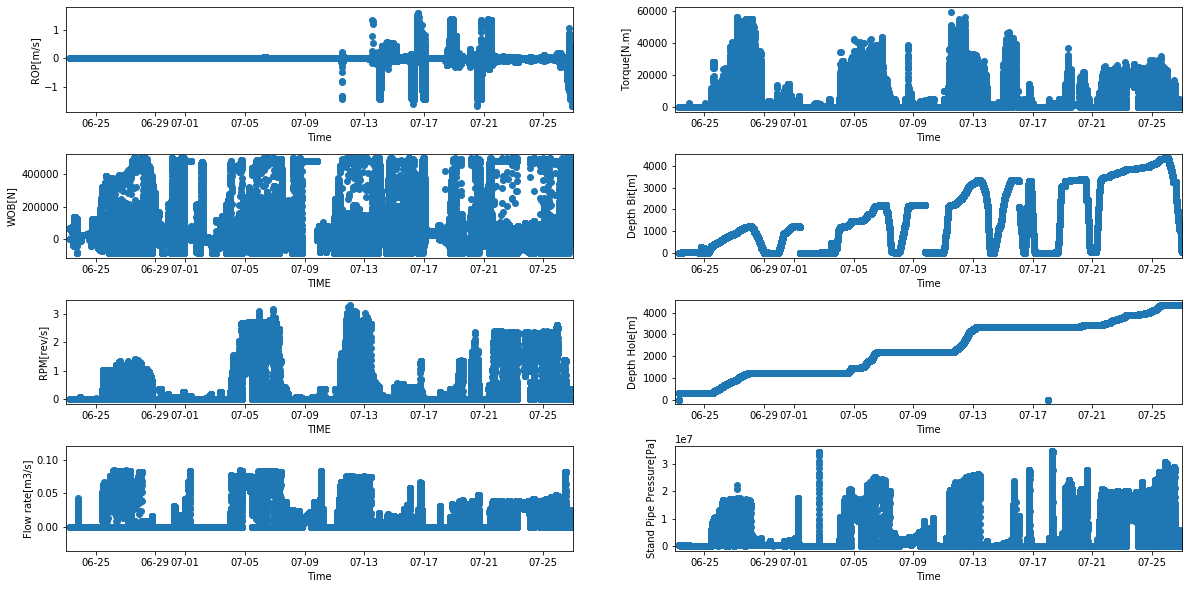

In [15]:
# Plot variables vs time:
df = df_merged
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))


WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

plt.show()

In [17]:
# Interpolation:
df = df_merged
df_test = df
df_test['ROP[m/s]'] = df_test['ROP[m/s]'].interpolate()
df_test['WOB[N]'] = df_test['WOB[N]'].interpolate()
df_test['Torque[N.m]'] = df_test['Torque[N.m]'].interpolate()
df_test['RPM[rev/s]'] = df_test['RPM[rev/s]'].interpolate()
df_test['Depth Bit[m]'] = df_test['Depth Bit[m]'].interpolate()
df_test['Flow rate[m3/s]'] = df_test['Flow rate[m3/s]'].interpolate()
df_test['Stand Pipe Pressure[Pa]'] = df_test['Stand Pipe Pressure[Pa]'].interpolate()
df_test

time  Depth Hole[m]  Depth Bit[m]      ROP[m/s]  \
0       2020-06-23 06:58:29+00:00           0.00      0.000000  0.000000e+00   
1       2020-06-23 06:58:30+00:00           0.00      0.000000  0.000000e+00   
2       2020-06-23 06:58:32+00:00           0.00      0.000000  0.000000e+00   
3       2020-06-23 06:58:34+00:00           0.00      0.000000  0.000000e+00   
4       2020-06-23 06:58:35+00:00           0.00      0.000000  0.000000e+00   
...                           ...            ...           ...           ...   
1413688 2020-07-26 23:59:53+00:00        4373.01     50.077800 -5.123580e-06   
1413689 2020-07-26 23:59:55+00:00        4373.01     50.077800 -3.795250e-07   
1413690 2020-07-26 23:59:56+00:00        4373.01     50.077800  4.364530e-06   
1413691 2020-07-26 23:59:59+00:00        4373.01     50.077800  3.225960e-06   
1413692 2020-07-27 00:00:00+00:00        4373.01     50.077784  3.225960e-06   

         RPM[rev/s]    WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
0               0.0     0.000          0.0              0.0   
1               0.0     0.000          0.0              0.0   
2               0.0     0.000          0.0              0.0   
3               0.0     0.000          0.0              0.0   
4               0.0     0.000          0.0              0.0   
...             ...       ...          ...              ...   
1413688         0.0  1237.570          0.0              0.0   
1413689         0.0  1165.565          0.0              0.0   
1413690         0.0  1093.560          0.0              0.0   
1413691         0.0  -301.642          0.0              0.0   
1413692         0.0  -301.642          0.0              0.0   

         Stand Pipe Pressure[Pa]  
0                     285027.000  
1                     284982.500  
2                     284938.000  
3                     285160.000  
4                     285102.500  
...                          ...  
1413688                 6729.450  
1413689                 6659.345  
1413690                 6589.240  
1413691                 6617.100  
1413692                 6617.100  

[1413693 rows x 9 columns]

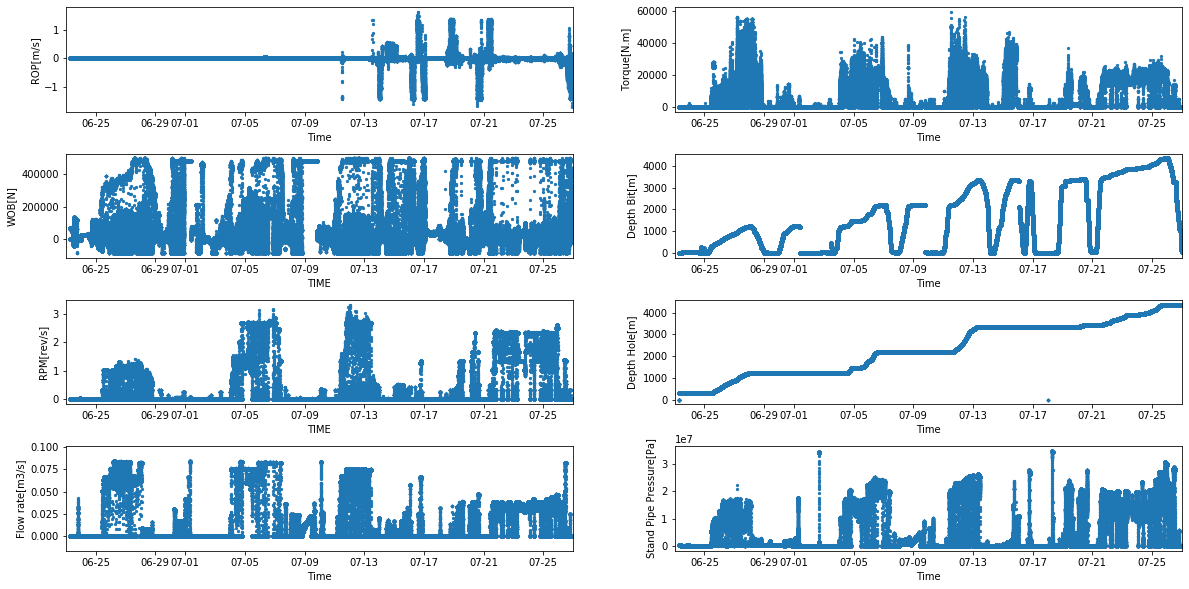

In [17]:
# Plot variables vs time after interpolation:
df = df_test
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))


WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

plt.show()

In [18]:
# Delete rows when ROP is 0
df = df_test
df = df[df['ROP[m/s]']>0]
df

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
93650   2020-06-25 12:32:25+00:00     319.011900    319.012000  0.000198   
93651   2020-06-25 12:32:28+00:00     319.032160    319.032000  0.000536   
93652   2020-06-25 12:32:30+00:00     319.043744    319.043744  0.000729   
93653   2020-06-25 12:32:33+00:00     319.058720    319.059000  0.000979   
93654   2020-06-25 12:32:35+00:00     319.067290    319.065500  0.001092   
...                           ...            ...           ...       ...   
1413683 2020-07-26 23:59:40+00:00    4373.010000     50.077800  0.000002   
1413686 2020-07-26 23:59:48+00:00    4373.010000     50.077800  0.000003   
1413690 2020-07-26 23:59:56+00:00    4373.010000     50.077800  0.000004   
1413691 2020-07-26 23:59:59+00:00    4373.010000     50.077800  0.000003   
1413692 2020-07-27 00:00:00+00:00    4373.010000     50.077784  0.000003   

         RPM[rev/s]     WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
93650      0.670670  25126.200     3848.260         0.050537   
93651      0.668939  43064.400     5823.100         0.050537   
93652      0.678245  44874.600     6682.420         0.050520   
93653      0.689282  46198.200     5833.770         0.050555   
93654      0.688957  45784.400     6236.745         0.050573   
...             ...        ...          ...              ...   
1413683    0.000000    731.145        0.000         0.000000   
1413686    0.000000    369.939        0.000         0.000000   
1413690    0.000000   1093.560        0.000         0.000000   
1413691    0.000000   -301.642        0.000         0.000000   
1413692    0.000000   -301.642        0.000         0.000000   

         Stand Pipe Pressure[Pa]  
93650                5372950.000  
93651                5602810.000  
93652                5702020.000  
93653                5728160.000  
93654                5722830.000  
...                          ...  
1413683                 6744.155  
1413686                 6715.910  
1413690                 6589.240  
1413691                 6617.100  
1413692                 6617.100  

[451093 rows x 9 columns]

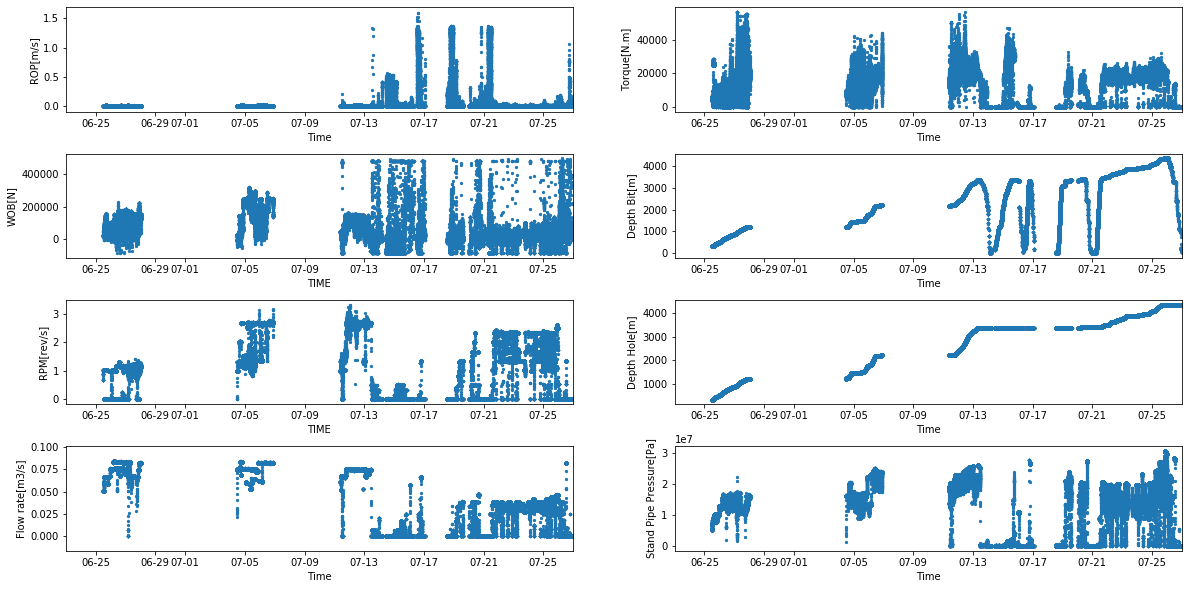

In [20]:
# Plot variables vs time after interpolation:

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))


WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

plt.show()

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


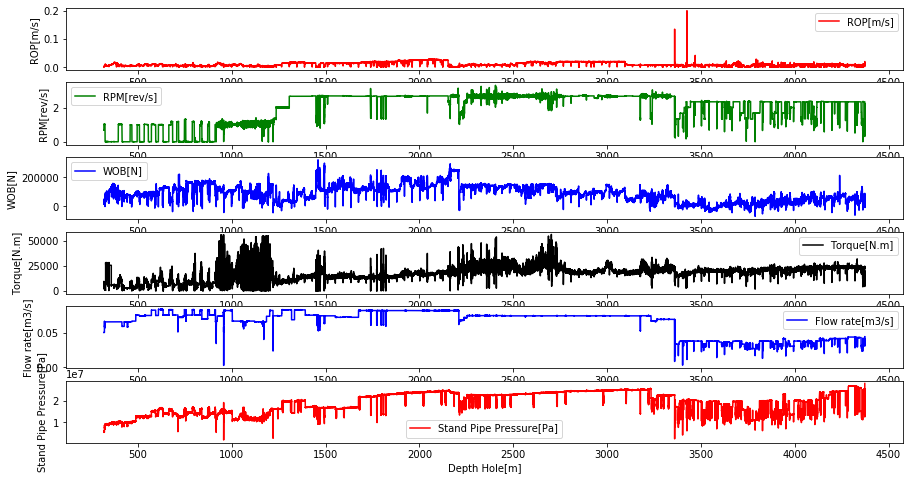

In [19]:
# Plot data vs depth (since the relationship is almost lineal) after interpolation:

fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)
plt.show()

In [20]:
# Removing outliers

Q1_ROP = df['ROP[m/s]'].quantile(0.25)
Q3_ROP = df['ROP[m/s]'].quantile(0.75)
IQR_ROP = Q3_ROP - Q1_ROP

Q1_RPM = df['RPM[rev/s]'].quantile(0.25)
Q3_RPM = df['RPM[rev/s]'].quantile(0.75)
IQR_RPM = Q3_RPM - Q1_RPM

Q1_TOR = df['Torque[N.m]'].quantile(0.25)
Q3_TOR= df['Torque[N.m]'].quantile(0.75)
IQR_TOR = Q3_TOR - Q1_TOR


Q1_WOB = df['WOB[N]'].quantile(0.25)
Q3_WOB = df['WOB[N]'].quantile(0.75)
IQR_WOB = Q3_WOB - Q1_WOB

Q1_SPP = df['Stand Pipe Pressure[Pa]'].quantile(0.25)
Q3_SPP = df['Stand Pipe Pressure[Pa]'].quantile(0.75)
IQR_SPP = Q3_SPP - Q1_SPP

Q1_FR = df['Flow rate[m3/s]'].quantile(0.25)
Q3_FR= df['Flow rate[m3/s]'].quantile(0.75)
IQR_FR = Q3_FR - Q1_FR


df_test_out = df.query('(@Q1_ROP-1.5*@IQR_ROP)<=`ROP[m/s]`<=(@Q3_ROP+1.5*@IQR_ROP)')
# df_test_out = df[(Q1_ROP-1.5*IQR_ROP)<=df['ROP[m/s]']]
# df_test_out = df[df['ROP[m/s]']<=(Q3_ROP+1.5*IQR_ROP)]

df_test_out = df.query('(@Q1_RPM-1.5*@IQR_RPM)<=`RPM[rev/s]`<=(@Q3_RPM+1.5*@IQR_RPM)')
# df_test_out = df[(Q1_RPM-1.5*IQR_RPM)<=df['RPM[rev/s]']]
# df_test_out = df[df['RPM[rev/s]']<=(Q3_RPM+1.5*IQR_RPM)]

df_test_out = df.query('(@Q1_TOR-1.5*@IQR_TOR)<=`Torque[N.m]`<=(@Q3_TOR+1.5*@IQR_TOR)')
# df_test_out = df[(Q1_TOR-1.5*IQR_TOR)<=df['Torque[N.m]']]
# df_test_out = df[df['Torque[N.m]']<=(Q3_TOR+1.5*IQR_TOR)]
df_test_out = df.query('(@Q1_WOB-1.5*@IQR_WOB)<=`WOB[N]`<=(@Q3_WOB+1.5*@IQR_WOB)')
# df_test_out = df[(Q1_WOB-1.5*IQR_WOB)<=df['WOB[N]']]
# df_test_out = df[df['WOB[N]']<=(Q3_WOB+1.5*IQR_WOB)]
df_test_out = df.query('(@Q1_SPP-1.5*@IQR_SPP)<=`Stand Pipe Pressure[Pa]`<=(@Q3_SPP+1.5*@IQR_SPP)')
# df_test_out = df[(Q1_SPP-1.5*IQR_SPP)<=df['Stand Pipe Pressure[Pa]']]
# df_test_out = df[df['Stand Pipe Pressure[Pa]']<=(Q3_SPP+1.5*IQR_SPP)]
df_test_out = df.query('(@Q1_FR-1.5*@IQR_FR)<=`Flow rate[m3/s]`<=(@Q3_FR+1.5*@IQR_FR)')
# df_test_out = df[(Q1_FR-1.5*IQR_FR)<=df['Flow rate[m3/s]']]
# df_test_out = df[df['Flow rate[m3/s]']<=(Q3_FR+1.5*IQR_FR)]

df_test_out

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
93650   2020-06-25 12:32:25+00:00     319.011900    319.012000  0.000198   
93651   2020-06-25 12:32:28+00:00     319.032160    319.032000  0.000536   
93652   2020-06-25 12:32:30+00:00     319.043744    319.043744  0.000729   
93653   2020-06-25 12:32:33+00:00     319.058720    319.059000  0.000979   
93654   2020-06-25 12:32:35+00:00     319.067290    319.065500  0.001092   
...                           ...            ...           ...       ...   
1413683 2020-07-26 23:59:40+00:00    4373.010000     50.077800  0.000002   
1413686 2020-07-26 23:59:48+00:00    4373.010000     50.077800  0.000003   
1413690 2020-07-26 23:59:56+00:00    4373.010000     50.077800  0.000004   
1413691 2020-07-26 23:59:59+00:00    4373.010000     50.077800  0.000003   
1413692 2020-07-27 00:00:00+00:00    4373.010000     50.077784  0.000003   

         RPM[rev/s]     WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
93650      0.670670  25126.200     3848.260         0.050537   
93651      0.668939  43064.400     5823.100         0.050537   
93652      0.678245  44874.600     6682.420         0.050520   
93653      0.689282  46198.200     5833.770         0.050555   
93654      0.688957  45784.400     6236.745         0.050573   
...             ...        ...          ...              ...   
1413683    0.000000    731.145        0.000         0.000000   
1413686    0.000000    369.939        0.000         0.000000   
1413690    0.000000   1093.560        0.000         0.000000   
1413691    0.000000   -301.642        0.000         0.000000   
1413692    0.000000   -301.642        0.000         0.000000   

         Stand Pipe Pressure[Pa]  
93650                5372950.000  
93651                5602810.000  
93652                5702020.000  
93653                5728160.000  
93654                5722830.000  
...                          ...  
1413683                 6744.155  
1413686                 6715.910  
1413690                 6589.240  
1413691                 6617.100  
1413692                 6617.100  

[451093 rows x 9 columns]

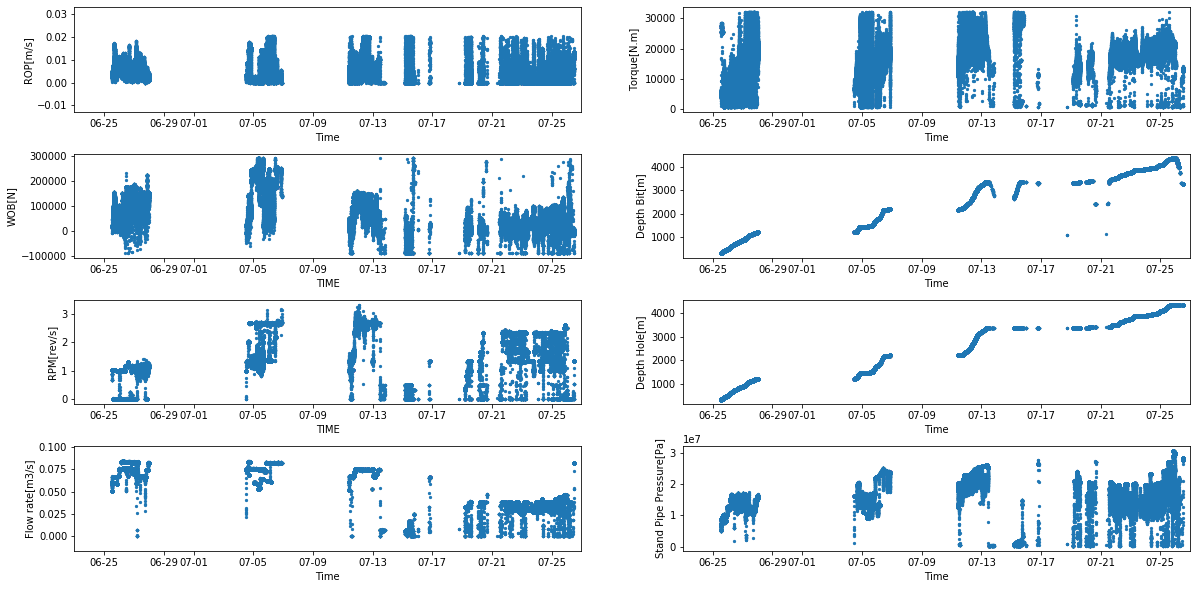

In [32]:
# Plot variables vs time after removing outliers:

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

plt.show()

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


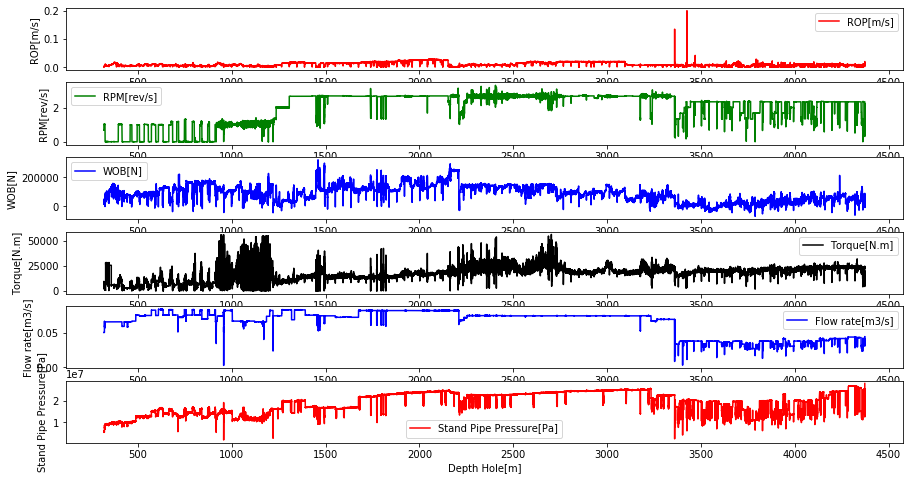

In [21]:
# Plot data vs depth (since the relationship is almost lineal) after removing outliers:

fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

In [25]:
# Since it does not remove outliers, we remove manually:
df = df_test_out
df = df[df['ROP[m/s]']<0.02]

# Noise reduction (window = 30):
df_test2 = df
df_test2['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 30, center=True).mean()
df_test2['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 30, center=True).mean()
df_test2['WOB[N]'] = df['WOB[N]'].rolling(window = 30, center=True).mean()
df_test2['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 30, center=True).mean()
df_test2['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 30, center=True).mean()
df_test2['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 30, center=True).mean()
df_test2.dropna(inplace = True)

# Noise reduction (window = 40):
df_test4 = df
df_test4['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 40, center=True).mean()
df_test4['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 40, center=True).mean()
df_test4['WOB[N]'] = df['WOB[N]'].rolling(window = 40, center=True).mean()
df_test4['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 40, center=True).mean()
df_test4['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 40, center=True).mean()
df_test4['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 40, center=True).mean()
df_test4.dropna(inplace = True)

# Noise reduction (window = 90):
df_test5 = df
df_test5['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 40, center=True).mean()
df_test5['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 40, center=True).mean()
df_test5['WOB[N]'] = df['WOB[N]'].rolling(window = 40, center=True).mean()
df_test5['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 40, center=True).mean()
df_test5['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 70, center=True).mean()
df_test5['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 70, center=True).mean()
df_test5.dropna(inplace = True)

# Noise reduction (window = 20):
df_test3 = df
df_test3['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 20, center=True).mean()
df_test3['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 20, center=True).mean()
df_test3['WOB[N]'] = df['WOB[N]'].rolling(window = 20, center=True).mean()
df_test3['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 20, center=True).mean()
df_test3['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 20, center=True).mean()
df_test3['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 20, center=True).mean()
df_test3.dropna(inplace = True)
df_test2

C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
93730   2020-06-25 12:35:10+00:00     319.473423     319.47300  0.002695   
93731   2020-06-25 12:35:13+00:00     319.479588     319.48000  0.002694   
93732   2020-06-25 12:35:15+00:00     319.484398     319.48400  0.002693   
93733   2020-06-25 12:35:16+00:00     319.488154     319.48800  0.002692   
93734   2020-06-25 12:35:18+00:00     319.494746     319.49500  0.002692   
...                           ...            ...           ...       ...   
1413141 2020-07-26 23:41:05+00:00    4373.010000      50.15700  0.000404   
1413144 2020-07-26 23:41:13+00:00    4373.010000      50.15700  0.000393   
1413145 2020-07-26 23:41:15+00:00    4373.010000      50.15690  0.000382   
1413147 2020-07-26 23:41:19+00:00    4373.010000      50.15700  0.000370   
1413151 2020-07-26 23:41:25+00:00    4373.010000      50.15695  0.000359   

           RPM[rev/s]        WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
93730    1.008214e+00  19627.021537  4846.896830     5.056944e-02   
93731    1.009004e+00  19619.013068  4845.065722     5.056945e-02   
93732    1.009728e+00  19611.519338  4843.137911     5.056946e-02   
93733    1.010388e+00  19604.560334  4841.126516     5.056948e-02   
93734    1.010990e+00  19598.145288  4839.040429     5.056949e-02   
...               ...           ...          ...              ...   
1413141  3.003847e-14  19433.465942     0.000000     1.411736e-14   
1413144  3.003847e-14  19506.718637     0.000000     1.411736e-14   
1413145  3.003847e-14  19576.390278     0.000000     1.411736e-14   
1413147  3.003847e-14  19642.040686     0.000000     1.411736e-14   
1413151  3.003847e-14  19703.181527     0.000000     1.411736e-14   

         Stand Pipe Pressure[Pa]  
93730               5.363548e+06  
93731               5.363685e+06  
93732               5.363842e+06  
93733               5.364013e+06  
93734               5.364195e+06  
...                          ...  
1413141             7.785172e+03  
1413144             7.796769e+03  
1413145             7.806882e+03  
1413147             7.815506e+03  
1413151             7.822640e+03  

[414955 rows x 9 columns]

In [35]:
# Plot variables vs time after removing NOISE:
df = df_test2
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))


WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

plt.show()

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


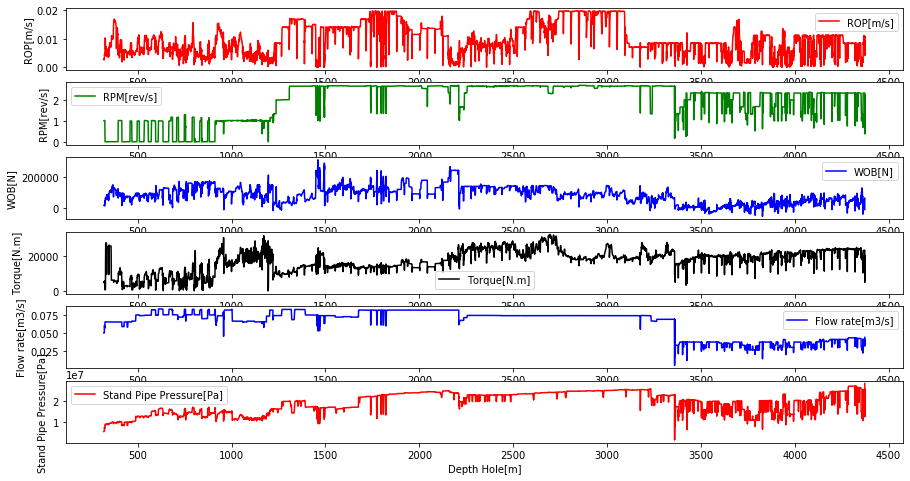

In [23]:
# Plot data vs depth (since the relationship is almost lineal) after removing NOISE:
df = df_test2
fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

In [38]:
# Plot variables vs time after removing NOISE (window 70):
df = df_test5
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))


WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 6, 23), datetime(2020, 7, 27))

plt.show()

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


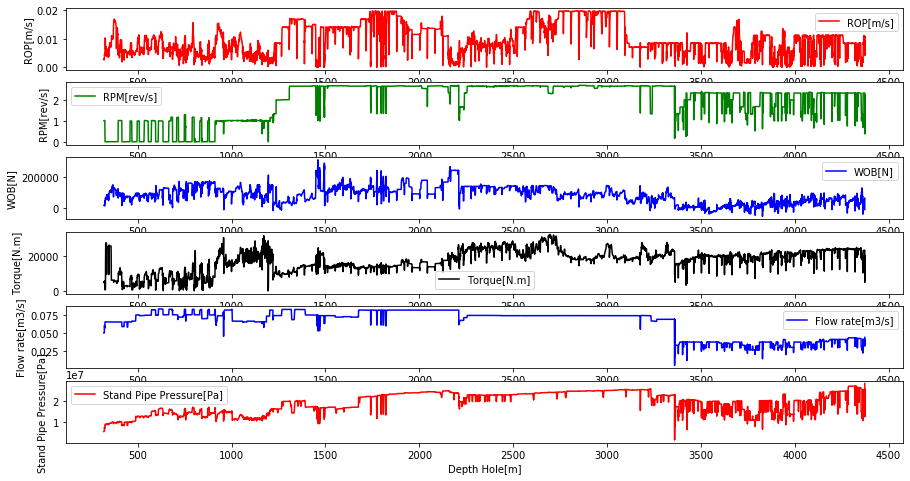

In [26]:
# Plot data vs depth (since the relationship is almost lineal) after removing NOISE(window 70):
df = df_test5
fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

In [27]:
# Create new csv file with data cleaned
df = df_test5

df.to_csv(r'Cleaned wells/NO162D41-5.csv', index = False, header=True)